In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

from matplotlib.pyplot import figure
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import chi2

### Load data

In [103]:
df=pd.read_csv('conversion_data.csv')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [105]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [106]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [107]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

###  Basic statistics 

In [109]:
df.describe(include = 'all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [110]:
100 * df.isna().sum() / df.shape[0]

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

### Correlation 

In [111]:
corr = df.corr()
corr

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


converted              1.000000
total_pages_visited    0.528994
new_user               0.152374
age                    0.088797
Name: converted, dtype: float64

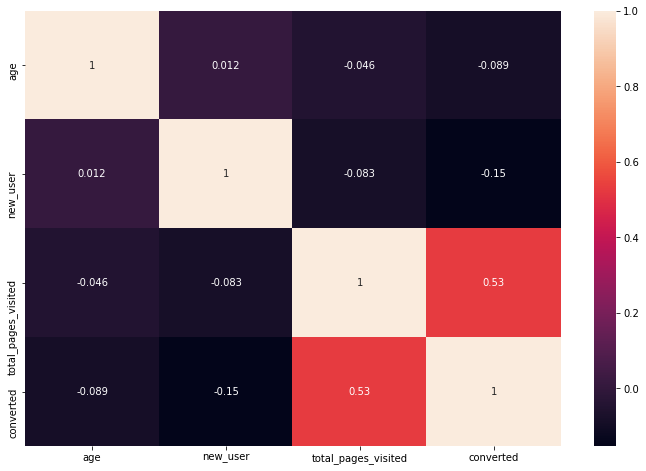

In [59]:
plt.subplots(figsize = (12,8))
sns.heatmap(corr, annot = True)

print()
display(abs(corr['converted']).sort_values(ascending = False))
print()

### Visualization

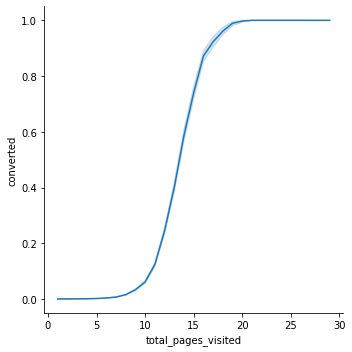

In [60]:
sns.relplot(x='total_pages_visited', y='converted', data= df, kind="line")

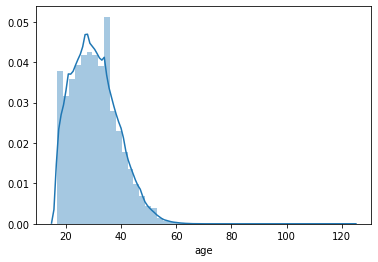

In [61]:
sns.distplot(df['age'])

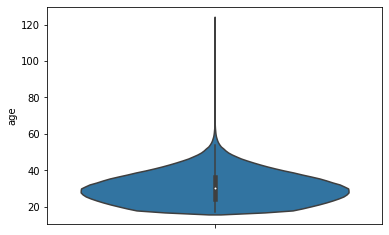

In [62]:
sns.violinplot(y='age', data = df)

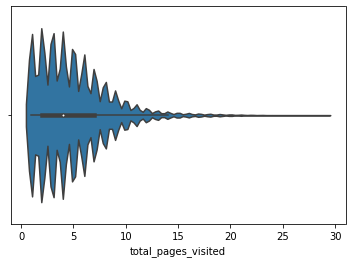

In [63]:
sns.violinplot(x='total_pages_visited', data = df)

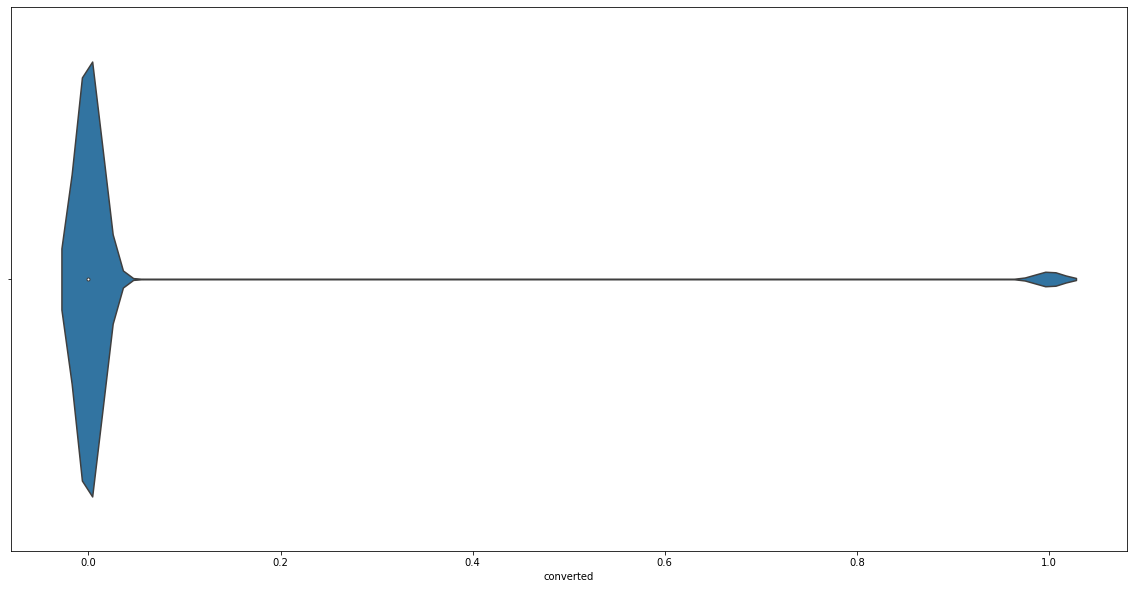

In [64]:
fig, ax = plt.subplots(figsize = (20,10))
sns.violinplot(x='converted', data = df)

In [65]:
Means = df.groupby('country')['age'].mean()
Median = df.groupby('country')['age'].median()
Modes = df.groupby('country')['age'].agg(lambda x: pd.Series.mode(x)[0])

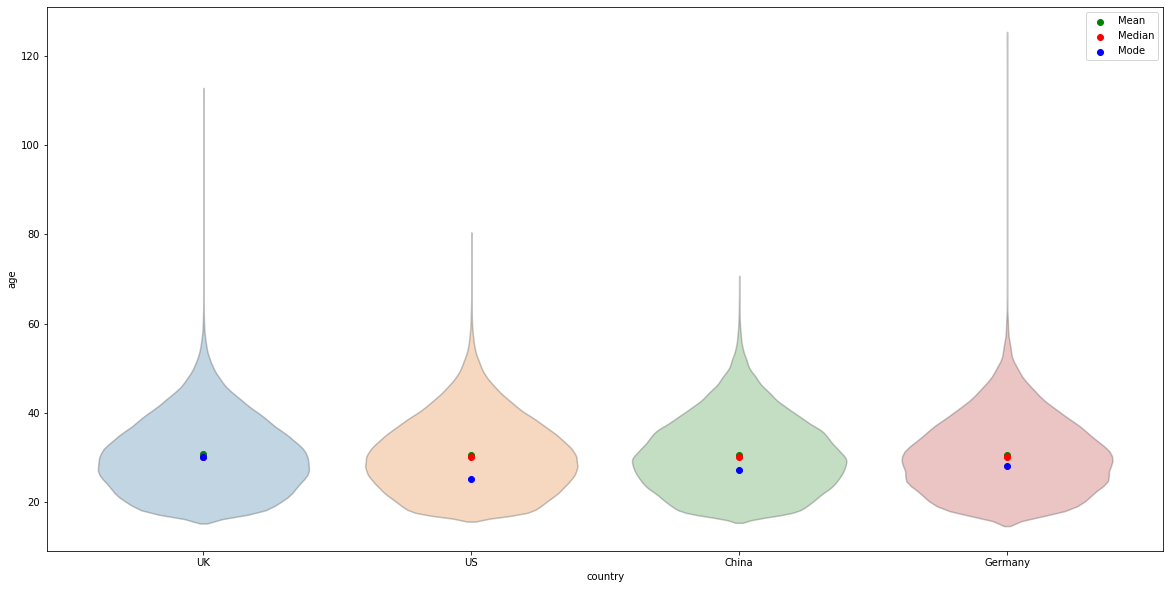

In [66]:
fig, ax = plt.subplots(figsize = (20,10))
sns.violinplot(x='country',y='age',data=df, inner=None)
plt.setp(ax.collections, alpha=.3)
plt.scatter(x=range(len(Means)),y=Means,c="g", label="Mean")
plt.scatter(x=range(len(Median)),y=Median,c="r",label="Median")
plt.scatter(x=range(len(Modes)),y=Modes,c ="b",label="Mode")
plt.legend()

KeyboardInterrupt: 

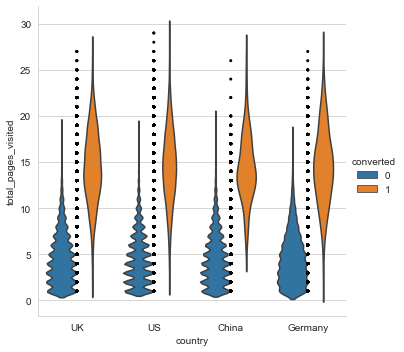

In [156]:
g = sns.catplot(x="country", y="total_pages_visited",hue = "converted", kind="violin", inner=None, data=df)
sns.swarmplot(x="country", y="total_pages_visited", color="k", size=3, data=df, ax=g.ax);

In [67]:
Means = df.groupby('country')['total_pages_visited'].mean()
Median = df.groupby('country')['total_pages_visited'].median()
Modes = df.groupby('country')['total_pages_visited'].agg(lambda x: pd.Series.mode(x)[0])

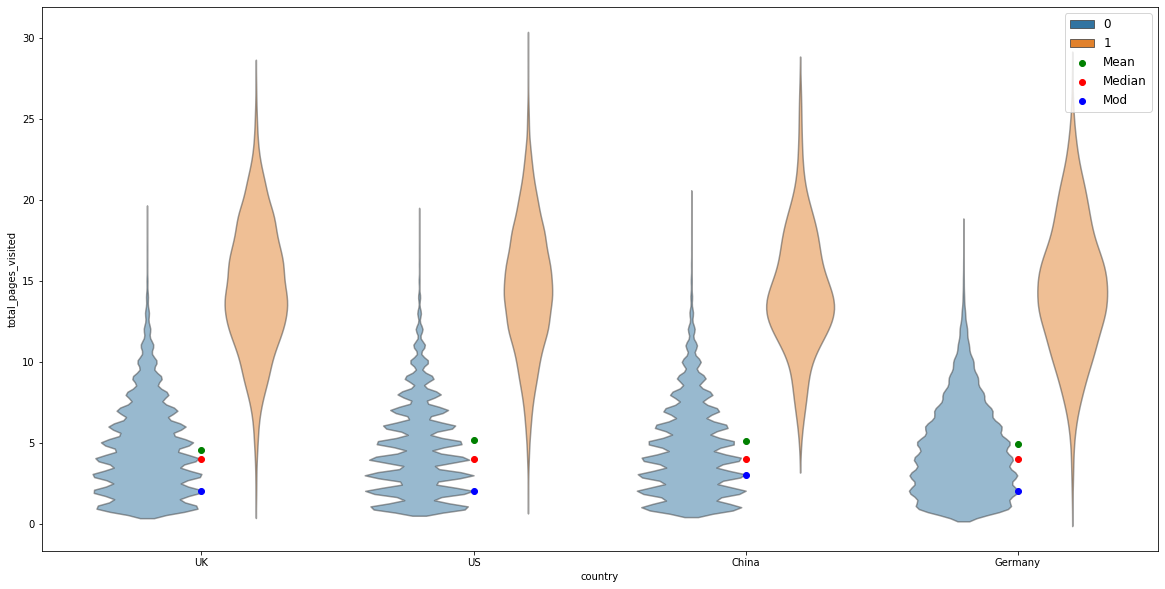

In [69]:
fig, ax = plt.subplots(figsize = (15,10))
sns.violinplot(x='country',y='total_pages_visited',data=df, hue = "converted", inner=None)
plt.setp(ax.collections, alpha=.5)
plt.scatter(x=range(len(Means)),y=Means,c="g", label = "Mean")
plt.scatter(x=range(len(Median)),y=Median,c="r", label = "Median")
plt.scatter(x=range(len(Modes)),y=Modes,c ="b", label = "Mod")
plt.legend(loc = 'left', fontsize = 'large') # loc = '2'
plt.show()

In [33]:
# from math import pi
 
# # Set data
# df = pd.DataFrame({
# 'group': ['A','B','C','D'],
# 'var1': [38, 1.5, 30, 4],
# 'var2': [29, 10, 9, 34],
# 'var3': [8, 39, 23, 24],
# 'var4': [7, 31, 33, 14],
# 'var5': [28, 15, 32, 14]
# })
# df

,group,var1,var2,var3,var4,var5
0,A,38.0,29,8,7,28
1,B,1.5,10,39,31,15
2,C,30.0,9,23,33,32
3,D,4.0,34,24,14,14


(0, 40)

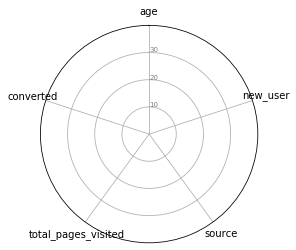

In [45]:
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

No handles with labels found to put in legend.


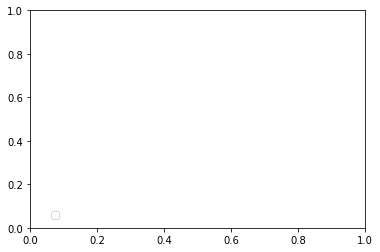

In [46]:
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('converted').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Yes")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('converted').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="No")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

KeyboardInterrupt: 

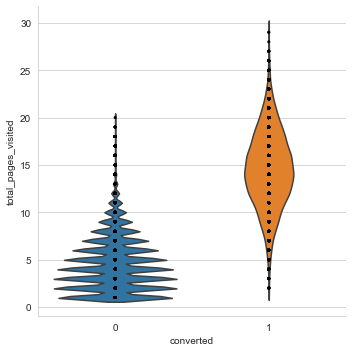

In [157]:
g = sns.catplot(x='converted', y="total_pages_visited", kind="violin", inner=None, data=df)
sns.swarmplot(x='converted', y="total_pages_visited", color="k", size=3, data=df, ax=g.ax);

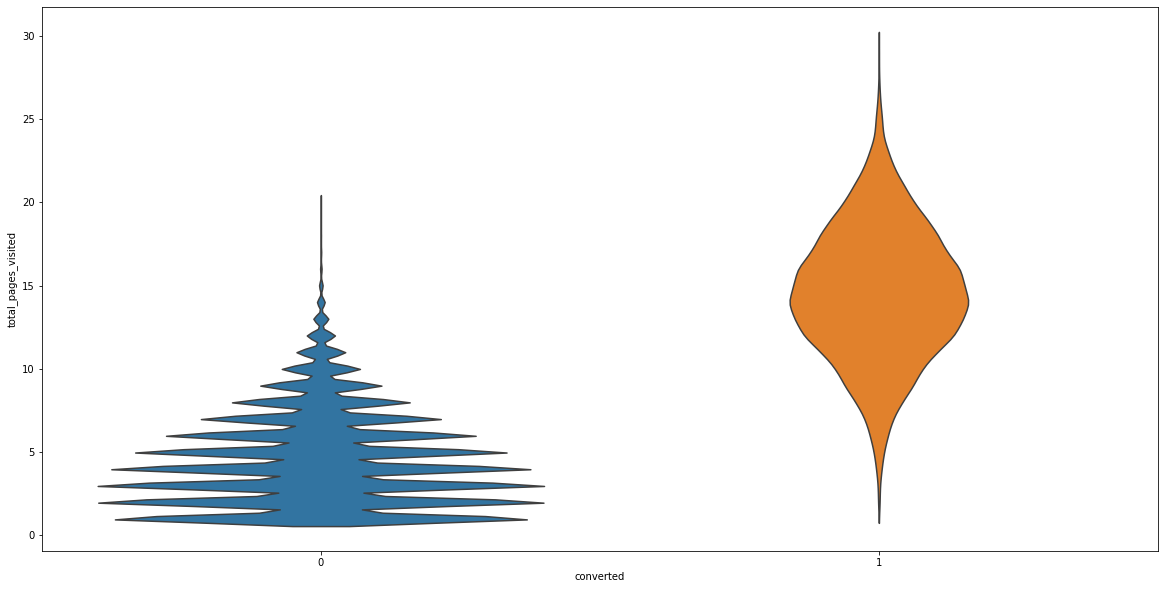

In [70]:
fig, ax = plt.subplots(figsize = (20,10))
sns.violinplot(x='converted' ,y='total_pages_visited',data=df, inner = None)
# plt.setp(ax.collections, alpha=.3)
# plt.scatter(x=range(len(Means)),y=Means,c="g")
# plt.scatter(x=range(len(Median)),y=Median,c="r")
# plt.scatter(x=range(len(Modes)),y=Modes,c ="b")

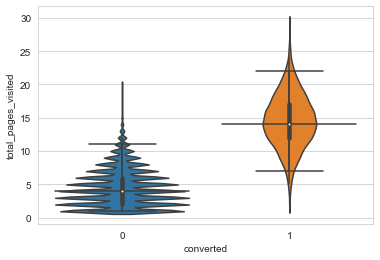

In [71]:
sns.set_style("whitegrid")
sns.boxplot(x="converted", y="total_pages_visited", data=df, showfliers=False, showbox=False, whis=[2.5,97.5])
sns.violinplot(x="converted", y="total_pages_visited", height = 7, data=df)

In [72]:
Means = df.groupby('converted')['total_pages_visited'].mean()
Median = df.groupby('converted')['total_pages_visited'].median()
Modes = df.groupby('converted')['total_pages_visited'].agg(lambda x: pd.Series.mode(x)[0])

In [73]:
Means = df.groupby('converted')['age'].mean()
Median = df.groupby('converted')['age'].median()
Modes = df.groupby('converted')['age'].agg(lambda x: pd.Series.mode(x)[0])

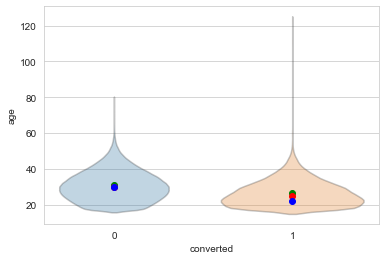

In [74]:
fig, ax = plt.subplots()
sns.violinplot(x='converted',y='age',data=df,inner=None)
plt.setp(ax.collections, alpha=.3)
plt.scatter(x=range(len(Means)),y=Means,c="g")
plt.scatter(x=range(len(Median)),y=Median,c="r")
plt.scatter(x=range(len(Modes)),y=Modes,c ="b")

country doesn's seem influence for converstion

# Total page visit seems have an influence for converstion

In [75]:
df.shape

(316200, 6)

In [76]:
df.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

### Divided futures named X and target  named y from dataset

In [112]:
X = df.drop('converted', axis = 1)
y = df['converted']

In [113]:
X=pd.get_dummies(X, drop_first=True)
X

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [114]:
X.columns

Index(['age', 'new_user', 'total_pages_visited', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')

### Train and test data

In [115]:
#Let's split data into train and test with 70%, 30% size:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [116]:
# y_test.converted.value_counts()/y_train.converted.sum()

In [117]:
# y_test.converted.value_counts()/y_test.converted.sum()

In [118]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [119]:
#Using Logistic Regression:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Train and test score

In [120]:
#Checking the score of train and test data

classifier.score(X_train, y_train)
classifier.score(X_test, y_test)
print()
print("  {:.4} is classifier train score ".format(classifier.score(X_train, y_train)))
print()
print("  {:.4} is classifier test score  ".format(classifier.score(X_test, y_test)))


  0.9862 is classifier train score 

  0.986 is classifier test score  


### Cross validation

In [121]:
#Checking the score after Cross Validation with 10 folds

moyen = cross_val_score(classifier,X_test, y_test, cv=10).mean()
std = cross_val_score(classifier,X_test, y_test, cv=10).std()

print()
print("  {:.4} is the  classifier score after cross validation ".format(moyen))
print()
print("  {:.4} is a standard deviation score ".format(std))


  0.986 is the  classifier score after cross validation 

  0.000926 is a standard deviation score 


In [122]:
# Let's now make a prediction

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[9.98204292e-01, 1.79570820e-03],
       [9.99975670e-01, 2.43301227e-05],
       [9.94676748e-01, 5.32325229e-03],
       ...,
       [9.99902467e-01, 9.75325744e-05],
       [9.95245435e-01, 4.75456543e-03],
       [9.99401428e-01, 5.98571783e-04]])

### Logis Roc curve

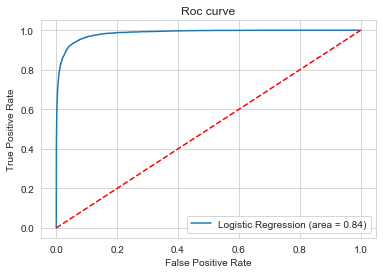

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1]) 
"""on séléctionne la colonne 1 de predict proba car on a une colonne par classe de y
et qu'on a besoin e P(y=1)"""
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [125]:
# # Class count
# nb_converted, nb_no_converted = df['converted'].value_counts()

# # Divide by class
# df1 = df[df['no_converted'] == 0]
# df2 = df[df['converted'] == 1]

# # Sample nb_users_unengaged users from engaged users data
# df_users_engaged_under = df_users_engaged.sample(nb_users_unengaged)
# df_engaged_data_under = pd.concat([df_users_engaged_under, df_users_unengaged], axis=0)

### Logis confusion matrix

In [126]:
# Let's now plot and see the confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
class_names = df.converted.unique()
cm = confusion_matrix(y_test, y_pred)

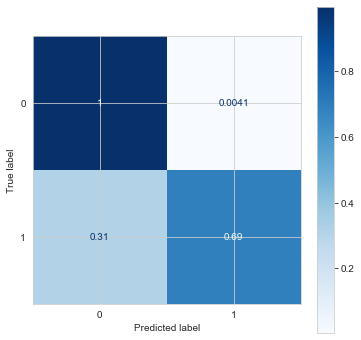

In [127]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(classifier, 
                      X_test, 
                      y_test,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize='true',
                      ax=ax)

### Logis classifier repport

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test), target_names=[" 1 ", " 0 "]))

              precision    recall  f1-score   support

          1        0.99      1.00      0.99     91800
          0        0.85      0.69      0.76      3060

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [129]:
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d")

In [130]:
# from sklearn.metrics import plot_confusion_matrix
# class_names = df.converted.unique()

# # np.set_printoptions(precision=1)

# # Plot non-normalized confusion matrix
# # titles_options = [("Confusion matrix, without normalization", None),
# #                   ("Normalized confusion matrix", 'true')]
# # for title, normalize in titles_options:
# fig, ax = plt.subplots(figsize=(8, 8))
# disp.plot_confusion_matrix(classifier , X_test, y_test,
#                                  display_labels=class_names,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
# # disp.ax_.set_title(title)

# # title
# disp.confusion_matrix

# plt.show()

### Futures importances

In [131]:
feature_importance = chi2(X, y)
feature_importance 

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [132]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total_pages_visited,202697.509485,0.000000e+00
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


<Figure size 1440x720 with 0 Axes>

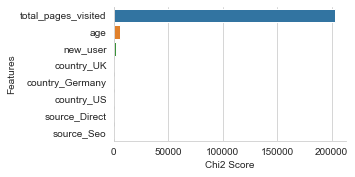

In [133]:
plt.figure(figsize = (20, 10))
ax = sns.catplot(x = "Chi2 Score", y = [index for index in feature_ranking.index], data = feature_ranking, kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

## RandomForest Model building

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(X_train, y_train)

Rf_train = rf_classifier.score(X_train, y_train)
Rf_test = rf_classifier.score(X_test, y_test)
print()
print("  {:.4} is the randomForest train score ".format(Rf_train))
print()
print("  {:.4} is the randomForest test score ".format(Rf_test))


  0.9886 is the randomForest train score 

  0.984 is the randomForest test score 


In [145]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## RF Roc curve

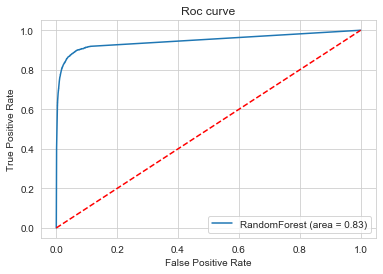

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1]) 
"""on séléctionne la colonne 1 de predict proba car on a une colonne par classe de y
et qu'on a besoin e P(y=1)"""
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

## RF confusion matrix

In [148]:
# Let's now plot and see the confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
class_names = df.converted.unique()
cm = confusion_matrix(y_test, y_pred)

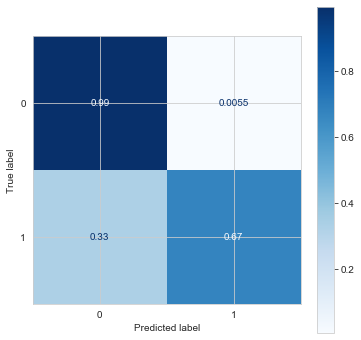

In [149]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(rf_classifier, 
                      X_test, 
                      y_test,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize='true',
                      ax=ax)

## RandomForest classifier repport

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_classifier.predict(X_test), target_names=[" 1 ", " 0 "]))

              precision    recall  f1-score   support

          1        0.99      0.99      0.99     91800
          0        0.80      0.67      0.73      3060

    accuracy                           0.98     94860
   macro avg       0.90      0.83      0.86     94860
weighted avg       0.98      0.98      0.98     94860



## Futures importances

In [151]:
feature_importance = chi2(X, y)
feature_importance 

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [152]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total_pages_visited,202697.509485,0.000000e+00
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


<Figure size 1440x1440 with 0 Axes>

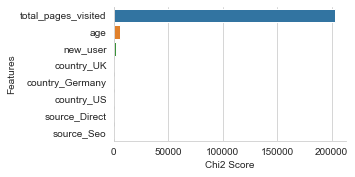

In [154]:
plt.figure(figsize = (20, 20))
ax = sns.catplot(x = "Chi2 Score", y = [index for index in feature_ranking.index], data = feature_ranking, kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

#### GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(10, 30, 5),
          "max_depth" : range(1,5),
          "max_features" : range(1,5)
          }

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  9.1min finished


In [99]:
classifier.best_params_

{'max_depth': 4, 'max_features': 4, 'n_estimators': 15}

In [100]:
Best_est_train = classifier.best_estimator_.score(X_train, y_train)
Best_est_test = classifier.best_estimator_.score(X_test, y_test)

print()
print(" The classifier best estimator train is : {}".format(Best_est_train ))
print()
print(" The classifier best estimator test is : {} ".format(Best_est_test))


 The classifier best estimator train is : 0.9853392970091263

 The classifier best estimator test is : 0.985336285051655 
